In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

In [4]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
import math
from IPython.display import Image  
from sklearn import tree
from os import system
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [5]:
from numpy import array
from sklearn.model_selection import LeaveOneOut
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection  import StratifiedKFold, cross_val_score
import pylab as pl
from sklearn.utils import shuffle
from sklearn.preprocessing import binarize

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder 
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [8]:
#1)Import and understand the data.
#A. Import ‘signal-data.csv’ as DataFrame. 
data = pd.read_csv("signal-data.csv",header=None)

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (591) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,590,591
0,Time,0.00,1.00,2.0000,3.0000,4.0000,5.0,6.0000,7.0000,8.0000,...,581.0000,582.0000,583.0000,584.0000,585.0000,586.0000,587.0000,588.0000,589.0000,Pass/Fail
1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
2,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
3,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
4,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1


In [10]:
data.shape

(1568, 592)

In [11]:
#B. Print 5 point summary and share at least 2 observations
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,590
count,1562.000000,1561.000000,1554.000000,1554.000000,1554.000000,1554.000000,1554.000000,1559.000000,1566.000000,1566.000000,...,619.000000,619.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3012.523028,2494.251992,2199.132551,1395.479989,4.196886,99.938867,101.051703,0.126233,1.467036,0.004907,...,0.942382,98.714770,0.871187,0.387356,0.376531,3.439193,0.395408,0.391066,0.380519,99.982338
std,105.991460,102.218492,63.094347,442.961893,56.337393,2.409895,6.685745,0.174431,0.180958,0.227952,...,23.311952,89.579617,14.689776,14.727293,14.752836,15.129593,14.802919,14.828304,14.853847,94.672420
min,0.000000,1.000000,2.000000,0.000000,0.681500,5.000000,6.000000,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.245000,2452.150000,2180.986050,1081.875800,1.017700,100.000000,97.920000,0.121100,1.411225,-0.010800,...,0.003400,46.262100,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600
50%,3011.405000,2499.350000,2201.027800,1285.214400,1.316800,100.000000,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.377600,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000
75%,3056.632500,2538.760000,2218.055500,1590.982550,1.528250,100.000000,104.586700,0.123800,1.516900,0.008400,...,0.006500,116.888550,0.502400,0.016500,0.004100,3.295750,0.027600,0.020350,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.000000,129.252200,7.000000,8.000000,9.000000,...,580.000000,737.304800,582.000000,583.000000,584.000000,585.000000,586.000000,587.000000,588.000000,737.304800


1)From the observation it contains more independent features such as around 591 features and pass/fail  chosen as dependent variable

2)There are more null values and unexpected values present in target variable.

In [12]:
data.shape

(1568, 592)

In [13]:
data.isnull().sum()

0       0
1       6
2       7
3      14
4      14
       ..
587     1
588     1
589     1
590     1
591     0
Length: 592, dtype: int64

In [14]:
data.isnull().value_counts

<bound method DataFrame.value_counts of         0      1      2      3      4      5      6      7      8      9    \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1563  False  False  False  False  False  False  False  False  False  False   
1564  False  False  False  False  False  False  False  False  False  False   
1565  False  False  False  False  False  False  False  False  False   True   
1566  False  False  False  False  False  False  False  False  False  False   
1567  False  False  False  False  False  False  False  False  False   True   

      ...    582    583

In [15]:
#2. Data cleansing:
#A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. 
d= data.copy()   
 
limit = int(data.shape[0]*0.2)

null_dict = dict(data.isnull().sum())

for col in list(data.columns)  :
    num_null = int(null_dict[col])
    if num_null> limit :
        if  (col)<3 : print('Dropping column no. :',col,'\t\t and Number of NULL values :',num_null)
        else : print('Dropping columns no. :',col,'\t\t and Number of NULL values:',num_null)
        data.drop([col],axis=1,inplace=True) 
                              
print ('\nFinal Shape ->',data.shape)                   
                        

Dropping columns no. : 73 		 and Number of NULL values: 794
Dropping columns no. : 74 		 and Number of NULL values: 794
Dropping columns no. : 86 		 and Number of NULL values: 1341
Dropping columns no. : 110 		 and Number of NULL values: 1018
Dropping columns no. : 111 		 and Number of NULL values: 1018
Dropping columns no. : 112 		 and Number of NULL values: 1018
Dropping columns no. : 113 		 and Number of NULL values: 715
Dropping columns no. : 158 		 and Number of NULL values: 1429
Dropping columns no. : 159 		 and Number of NULL values: 1429
Dropping columns no. : 221 		 and Number of NULL values: 1341
Dropping columns no. : 245 		 and Number of NULL values: 1018
Dropping columns no. : 246 		 and Number of NULL values: 1018
Dropping columns no. : 247 		 and Number of NULL values: 1018
Dropping columns no. : 248 		 and Number of NULL values: 715
Dropping columns no. : 293 		 and Number of NULL values: 1429
Dropping columns no. : 294 		 and Number of NULL values: 1429
Dropping column

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Columns: 560 entries, 0 to 591
dtypes: float64(558), object(2)
memory usage: 6.7+ MB


In [17]:
data.fillna(data.mean().round(1),inplace=True)

C:\Users\HP\AppData\Local\Temp/ipykernel_187640/2837133074.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean().round(1),inplace=True)


In [18]:
data

,0,1,2,3,4,5,6,7,8,9,...,578,583,584,585,586,587,588,589,590,591
0,Time,0.00,1.00,2.0000,3.0000,4.0000,5.0,6.0000,7.0000,8.0000,...,577.0000,582.0000,583.0000,584.0000,585.0000,586.0000,587.0000,588.0000,589.0000,Pass/Fail
1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.4000,0.4000,0.4000,100.0000,-1
2,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
3,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
4,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1565,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.5000,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1566,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [19]:
data.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
587    0
588    0
589    0
590    0
591    0
Length: 560, dtype: int64

In [20]:
unique = data.nunique() 
col_drop = unique[unique == 1].index

In [23]:
#B. Identify and drop the features which are having same value for all the rows.
data.drop(data.index[0], axis=0,inplace=True)

In [24]:
#C. Drop other features if required using relevant functional knowledge. Clearly justify the same
df =data.drop(data.columns[0], axis=1) 
df.shape 

(1566, 559)

In [25]:
df.shape

(1566, 559)

In [26]:
df.dtypes

1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
587    float64
588    float64
589    float64
590    float64
591     object
Length: 559, dtype: object

In [27]:
def print_unique_col_values(df): 
    for cols in df:
        if df[cols].dtypes=='object':
            print(f'{cols} : {df[cols].unique()}')
print_unique_col_values(df)    
        

591 : ['-1' '1' -1 1]


In [28]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,578,583,584,585,586,587,588,589,590,591
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
4,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
5,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
6,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1


In [29]:
df.dtypes

1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
587    float64
588    float64
589    float64
590    float64
591     object
Length: 559, dtype: object

In [30]:
df.astype(int)

,1,2,3,4,5,6,7,8,9,10,...,578,583,584,585,586,587,588,589,590,591
2,3095,2465,2230,1463,0,100,102,0,1,0,...,10,0,0,0,4,0,0,0,208,-1
3,2932,2559,2186,1698,1,100,95,0,1,0,...,9,0,0,0,3,0,0,0,82,1
4,2988,2479,2199,909,1,100,104,0,1,0,...,8,0,0,0,2,0,0,0,73,-1
5,3032,2502,2233,1326,1,100,100,0,1,0,...,10,0,0,0,99,0,0,0,73,-1
6,2946,2432,2233,1326,1,100,100,0,1,0,...,13,0,0,0,3,0,0,0,44,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899,2464,2179,3085,1,100,82,0,1,0,...,11,0,0,0,2,0,0,0,203,-1
1564,3052,2522,2198,1124,0,100,98,0,1,0,...,17,0,0,0,2,0,0,0,203,-1
1565,2978,2379,2206,1110,0,100,99,0,1,0,...,17,0,0,0,3,0,0,0,43,-1
1566,2894,2532,2177,1183,1,100,98,0,1,0,...,19,0,0,0,3,0,0,0,93,-1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 2 to 1567
Columns: 559 entries, 1 to 591
dtypes: float64(558), object(1)
memory usage: 6.7+ MB


In [32]:
df.dtypes

1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
587    float64
588    float64
589    float64
590    float64
591     object
Length: 559, dtype: object

In [33]:
df.dtypes.value_counts()

float64    558
object       1
dtype: int64

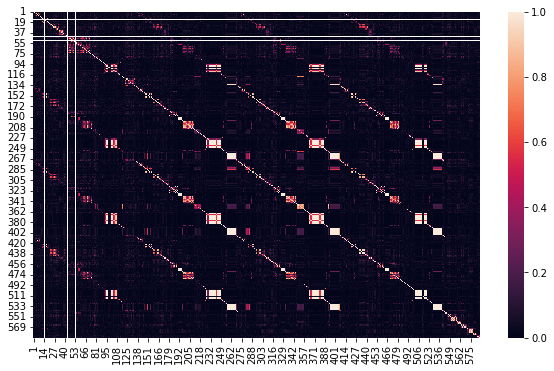

In [34]:
#D. Check for multi-collinearity in the data and take necessary action. 
plt.figure(figsize = (10,6))
sns.heatmap(abs(df.corr()), vmin = 0, vmax = 1)
plt.show()

In [35]:
#E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. 
#replacing the target feature variables as 0,1
df.replace(-1,0,inplace = True)  
df.replace('-1', 0, inplace = True)
df.replace('1',1,inplace = True)
df.replace(1,1,inplace = True)

In [36]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,578,583,584,585,586,587,588,589,590,591
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
4,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
5,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
6,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,0


In [37]:
df.astype(int)

,1,2,3,4,5,6,7,8,9,10,...,578,583,584,585,586,587,588,589,590,591
2,3095,2465,2230,1463,0,100,102,0,1,0,...,10,0,0,0,4,0,0,0,208,0
3,2932,2559,2186,1698,1,100,95,0,1,0,...,9,0,0,0,3,0,0,0,82,1
4,2988,2479,2199,909,1,100,104,0,1,0,...,8,0,0,0,2,0,0,0,73,0
5,3032,2502,2233,1326,1,100,100,0,1,0,...,10,0,0,0,99,0,0,0,73,0
6,2946,2432,2233,1326,1,100,100,0,1,0,...,13,0,0,0,3,0,0,0,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899,2464,2179,3085,1,100,82,0,1,0,...,11,0,0,0,2,0,0,0,203,0
1564,3052,2522,2198,1124,0,100,98,0,1,0,...,17,0,0,0,2,0,0,0,203,0
1565,2978,2379,2206,1110,0,100,99,0,1,0,...,17,0,0,0,3,0,0,0,43,0
1566,2894,2532,2177,1183,1,100,98,0,1,0,...,19,0,0,0,3,0,0,0,93,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 2 to 1567
Columns: 559 entries, 1 to 591
dtypes: float64(558), int64(1)
memory usage: 6.7 MB


In [39]:
df.dtypes.value_counts()

float64    558
int64        1
dtype: int64

F:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

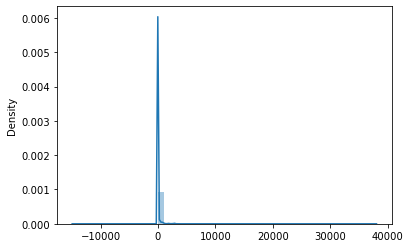

In [40]:
#3. Data analysis & visualisation:
#A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [
sns.distplot(df)

From the observation it seems the univariate analysis of data is shows zero

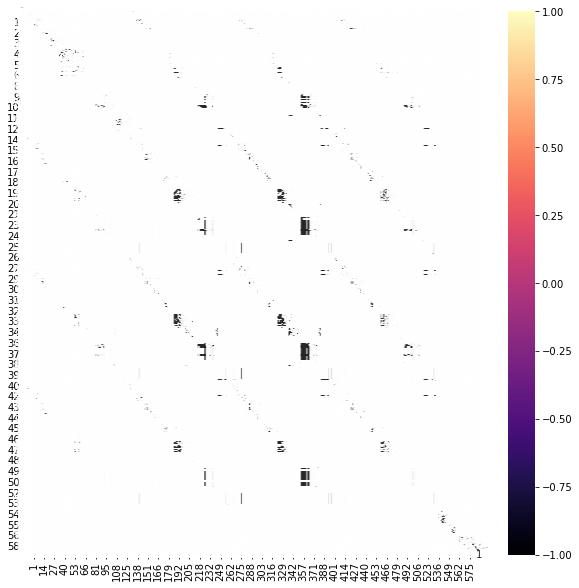

In [41]:
#B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax, annot=True,cmap="magma")
plt.show()

From the observation it shows strong correlation in this analysis.

In [42]:
df.corr

<bound method DataFrame.corr of           1        2          3          4       5      6         7       8    \
2     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
3     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
4     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
5     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6     2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1563  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   82.2467  0.1248   
1564  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1565  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1566  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   
1567  2944.92  2450.76  2195.4444  2914.1792  1.5978  100.0   85.1011  0.1235

In [43]:
#4. Data pre-processing: 
#A. Segregate predictors vs target attributes.
# It shows imbalanced data
X = df.iloc[:,:-1] 
y = df.iloc[:, -1]
y.value_counts()

0    1462
1     104
Name: 591, dtype: int64

In [44]:
#B. Check for target balancing and fix it if found imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

In [54]:
pip install -U imbalanced-learn

In [56]:
#The imbalanced data were balanced by SMOTE and it is resampled
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=1)
X_train_res,y_train_res= sm.fit_resample(X_train,y_train.ravel())

In [57]:
X_train.shape 

(1174, 558)

In [58]:
y_train.shape

(1174,)

In [59]:
#C. Perform train-test split and standardise the data or vice versa if required
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#5. Model training, testing and tuning:
#A. Use any Supervised Learning technique to train a model
svm = SVC()  
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9336734693877551

In [61]:
ran_for = RandomForestClassifier(n_estimators=15)
ran_for.fit(X_train,y_train)
ran_for.score(X_test,y_test)

0.9311224489795918

In [62]:
log_reg = LogisticRegression() 
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  


0.8954081632653061

In [63]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_reg.score(X_test,y_test)

-4.705272302824431e+19

By observing the above accuracy scores SVM Model is the best model

In [64]:
#B. Use cross validation techniques.
num_folds = 50 

kfold = KFold(n_splits=num_folds)
model = LogisticRegression()
results = cross_val_score(model, X_test, y_test, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py

[0.875      1.         1.         0.875      0.875      1.
 1.         1.         1.         1.         0.875      0.875
 0.875      1.         1.         0.875      0.875      0.875
 0.75       0.875      0.875      0.75       1.         1.
 0.875      0.75       1.         0.875      0.75       1.
 0.875      0.625      1.         0.75       1.         0.875
 0.875      1.         1.         0.875      1.         1.
 0.85714286 0.85714286 1.         0.85714286 0.85714286 1.
 0.71428571 0.57142857]
Accuracy: 89.929% (10.569%)


In [65]:
svm=SVC(kernel='rbf',C=30,gamma='auto') 
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9311224489795918

In [66]:
kernels = ['rbf','linear'] 
C = [1,10,20]
avg_score = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(SVC(kernel=kval,C=cval,gamma='auto'),X_train,y_train,cv=5)
        avg_score[kval+'_'+ str(cval)] = np.average(cv_scores)
        
    avg_score

In [77]:
#C. Apply hyper-parameter tuning techniques to get the best accuracy.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
import xgboost as xgb
sns.set_style(style= 'darkgrid')
import json
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from math import sqrt
from sklearn.model_selection import cross_validate
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

knn_cl = KNeighborsClassifier()


In [78]:
knn_cl.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:

param_grid = {'n_neighbors': list(range(1,9)), # Multiple parameters
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }


In [80]:
#D. Use any other technique/method which can enhance the model performance
from sklearn.model_selection import GridSearchCV  
grid_search = GridSearchCV(knn_cl,param_grid,cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [81]:
grid_search.best_params_ 

{'algorithm': 'auto', 'n_neighbors': 6}

In [82]:
grid_search.cv_results_['params'] 

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [83]:
#E. Display and explain the classification report in detail
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [84]:
s5= dt.score(X_test, y_test)
s5

0.8698979591836735

In [85]:
#F. Apply the above steps for all possible models that you have learnt so far.
from sklearn.decomposition import PCA #Principle component analysis
pca= PCA()
pca.fit(X_train,y_train)

PCA()

[0.09891673 0.16800497 0.2160729  0.25006756 0.27761848 0.30080398
 0.32193165 0.33973589 0.35597652 0.37094071 0.38487135 0.39861956
 0.41173471 0.42375776 0.43540036 0.44680087 0.45814682 0.46898655
 0.4793518  0.48962546 0.49964459 0.50956662 0.51909103 0.52835036
 0.53737783 0.54620647 0.55498275 0.56360919 0.57178598 0.57978863
 0.58745762 0.59481727 0.60202542 0.60919072 0.61626643 0.6230229
 0.62971795 0.63629827 0.64261246 0.648899   0.65506428 0.66110739
 0.66703643 0.67269194 0.67833422 0.68382186 0.68924982 0.69458133
 0.69987754 0.70509925 0.71027352 0.71518186 0.72000714 0.72475069
 0.72944473 0.73401368 0.73848828 0.74292022 0.74727154 0.75158127
 0.75578148 0.7598764  0.76390804 0.76792166 0.77186124 0.77570494
 0.77940597 0.78300859 0.78655841 0.78999479 0.79339241 0.79675846
 0.80006064 0.80331718 0.80646728 0.80959656 0.81262914 0.81563589
 0.81861139 0.82152379 0.82439906 0.82718736 0.82993572 0.83259668
 0.83520255 0.83779102 0.84032232 0.84279558 0.84526386 0.84768

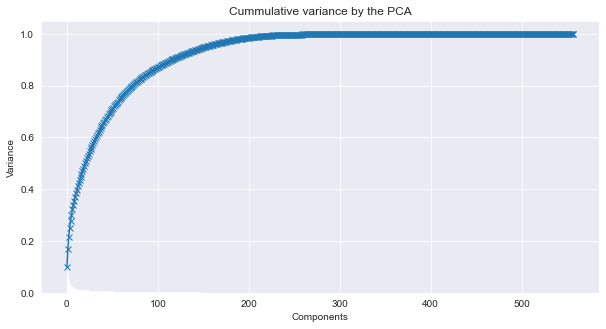

In [86]:
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-x')
plt.bar(x = range(0, len(pca.components_)), height = pca.explained_variance_ratio_)
plt.title('Cummulative variance by the PCA')
plt.ylabel('Variance')
plt.xlabel('Components')
plt.show()

In [87]:
pca = PCA(n_components=100) #l-bow curved at 100

pca.fit(X_train,y_train)
pca.score(X_test,y_test)

-56338.12794021138

In [88]:
grid_search.cv_results_['mean_test_score'] 

array([0.89093148, 0.93271042, 0.92420687, 0.93271766, 0.9318702 ,
       0.93356512, 0.93356512, 0.93356512, 0.89093148, 0.93271042,
       0.92420687, 0.93271766, 0.9318702 , 0.93356512, 0.93356512,
       0.93356512, 0.89093148, 0.93271042, 0.92420687, 0.93271766,
       0.9318702 , 0.93356512, 0.93356512, 0.93356512, 0.89093148,
       0.93271042, 0.92420687, 0.93271766, 0.9318702 , 0.93356512,
       0.93356512, 0.93356512])

In [89]:
#A. Display and compare all the models designed with their train and test accuracies
s1=0.8954081632653061  # Logistic regression score
s2=0.9336734693877551 # svm score
s3=0.9311224489795918 # Random forest score
s4=0.93356512 # Grid Search CV score
s5=0.8698979591836735 # Decision Tree Classifier

In [90]:
from sklearn.pipeline import Pipeline 

svm = SVC(random_state=1, gamma = 'auto')

pipe = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 100)), ('model', svm)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=100)),
                ('model', SVC(gamma='auto', random_state=1))])

In [91]:
s6 = pipe.score(X_test, y_test) #pipe line svm score
s6

0.9336734693877551

In [92]:
#B. Select the final best trained model along with your detailed comments for selecting this model. 
pd.DataFrame([s1, s2, s3, s4, s5,s6], #Accuracy of each model
             index = [ 'Logistic Regression','svm',
                      'Random forest', 'Grid search cv','Decision tree classifier','pipeline svm' ], columns = ['Accuracy'])

,Accuracy
Logistic Regression,0.895408
svm,0.933673
Random forest,0.931122
Grid search cv,0.933565
Decision tree classifier,0.869898
pipeline svm,0.933673


Compared to other techniques used SVM shows best accuracy, so SVM taken as best model

In [93]:
#C. Pickle the selected model for future use
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f) 

#D. Write your conclusion on the results. 

It is required to build all the model to find out the best model with best performing accuracy, SVM model is the best model compared to other model technique used.